## Dataset

In this project, I have used Decision Tree and K-nearest Neighbor Classification for the Wine Quality dataset.  
This dataset includes two sets in csv format, one for red wine and the other for white wine.  
The goal is to model wine quality based on physicochemical tests or measurements. 

Each wine sample is described by Eleven sensor measurements (or features) and One output label (quality level).

The eleven attributes include:

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 – alcohol

The output label represents the level of quality classified by wine experts. 
12 - quality (score between 0 and 10)

More details about these 12 attributes can be found in the reference: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Importing the required packages

In [812]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Reading two CSV files into respective data frames from the current working directory

In [813]:
def read_csv_files():
    directory = os.getcwd()
    print("The directory to read the csv files from is: ", directory)
    # Concatenating the absolute file path and file name
    red_wine_quality_file = os.path.join(os.path.abspath(directory), 'winequality-red.csv')

    if os.path.exists(red_wine_quality_file):
        red_wine_quality = pd.read_csv(red_wine_quality_file, sep=';')
    else:
        print('File winequality-red.csv does not exists at the location')

    return red_wine_quality

red_wine_quality = read_csv_files()

The directory to read the csv files from is:  C:\Users\munge\Data Mining and Knowledge Discovery\Decision Tree and K-nearest Neighbor Classification for Wine Quality Dataset


### Checking Red Wine Data Frame Features for Data Cleaning

In [814]:
# Setting the index starting from 1
red_wine_quality.index += 1 

print("Red Wine Quality Data Frame Shape: ", red_wine_quality.shape)

Red Wine Quality Data Frame Shape:  (1599, 12)


In [815]:
# Get summary of Data Frame
red_wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [816]:
red_wine_NaN_rows = red_wine_quality.shape[0] - red_wine_quality.dropna().shape[0]
print("Number of rows with Null or NaN for Red Wine Quality: ", red_wine_NaN_rows)

red_wine_NaN_cols = red_wine_quality.shape[1] - red_wine_quality.dropna().shape[1]
print("Number of columns with Null or NaN for Red Wine Quality: ", red_wine_NaN_cols)

Number of rows with Null or NaN for Red Wine Quality:  0
Number of columns with Null or NaN for Red Wine Quality:  0


In [817]:
# Get the sample 5 rows from data frame
(red_wine_quality.sample(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
772,9.4,0.685,0.26,2.4,0.082,23.0,143.0,0.99780,3.28,0.55,9.4,5
122,8.8,0.550,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,6
1450,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8
1431,7.4,0.410,0.24,1.8,0.066,18.0,47.0,0.99560,3.37,0.62,10.4,5
146,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5


#### Observation: 
After checking the data frame, there were no NaN or Null values or data type mismatch. Row Index reset to start from 1 and data cleaning is complete

## Part I: Decision Tree for Wine Classification

### Task 1: 
Python function to load the 1599 red wine samples from ‘winequality-red.csv’, and converting the column of quality to be binary labels: +1 if quality is larger than 6, and -1, if one’s quality is lower than 5.  

These two classes represent high quality wines and low-quality wines.  

This leads to a two-class dataset for binary classification purpose.

In [818]:
def binary_classification_wine_quality(input_dataframe):
    print('Shape of dataframe before dropping 5 and 6 quality values:',input_dataframe.shape)
    # Dropping rows with quality between 5 and 6
    indexNames = input_dataframe[(input_dataframe['quality'] >= 5) & (input_dataframe['quality'] <= 6)].index
    input_dataframe.drop(indexNames , inplace=True)
    print('Shape of dataframe after dropping 5 and 6 quality values:',input_dataframe.shape)
    # Reassigning values based on quality
    input_dataframe['quality'] = np.where(input_dataframe['quality']>6, +1, -1)
    return input_dataframe
    
red_wine_quality = binary_classification_wine_quality(red_wine_quality)

Shape of dataframe before dropping 5 and 6 quality values: (1599, 12)
Shape of dataframe after dropping 5 and 6 quality values: (280, 12)


In [819]:
# Taking sample value to check quality has 1 and -1 values
red_wine_quality.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1240,6.5,0.67,0.00,4.3,0.057,11.0,20.0,0.99488,3.45,0.56,11.8,-1
459,10.4,0.33,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,1
340,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,1
496,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,1
874,9.1,0.21,0.37,1.6,0.067,6.0,10.0,0.99552,3.23,0.58,11.1,1
946,10.2,0.44,0.42,2.0,0.071,7.0,20.0,0.99566,3.14,0.79,11.1,1
1135,8.5,0.28,0.35,1.7,0.061,6.0,15.0,0.99524,3.30,0.74,11.8,1
997,5.6,0.66,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,1
1481,5.6,0.62,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,-1
493,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,1


### Task 2
Python function which takes a set of wine samples with binary classes and returns the GINI index, misclassification error and entropy of this sample set.

Test function using the two-class dataset obtained in Task 1. 

In [820]:
def calculateError(feature):
    random_val = red_wine_quality[feature].mean()
    greater_frequency = red_wine_quality[red_wine_quality[feature] >= random_val][[feature, 'quality']].quality.value_counts()
    smaller_frequency = red_wine_quality[red_wine_quality[feature] < random_val][[feature, 'quality']].quality.value_counts()
    greater_total = float(greater_frequency[1] + greater_frequency[-1])
    smaller_total = float(smaller_frequency[1] + smaller_frequency[-1])
    feature_total = float(red_wine_quality[feature].count())
    val_1 = greater_frequency[1]/greater_total
    val_2 = greater_frequency[-1]/greater_total
    greater_error = 1 - max(val_1, val_2)
    val_3 = smaller_frequency[1]/smaller_total
    val_4 = smaller_frequency[-1]/smaller_total
    smaller_error = 1 - max(val_3, val_4)
    error = (greater_total/feature_total)*greater_error + (smaller_total)/feature_total*smaller_error
    return error

In [821]:
def calculate(input_dataframe):
    probabilities = red_wine_quality['quality'].value_counts(normalize=True)
    gini_index = 1 - np.sum(np.square(probabilities))
    entropy = -1 * np.sum(np.log2(probabilities) * probabilities)
    
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
    error_data = []
    for i in features:
        error_data.append(calculateError(i))

    return gini_index, entropy, error_data
    
calculate(red_wine_quality)

(0.3487499999999999,
 0.7691928290130138,
 [0.22499999999999998,
  0.22499999999999998,
  0.225,
  0.22500000000000003,
  0.225,
  0.22499999999999995,
  0.22499999999999998,
  0.225,
  0.22499999999999998,
  0.22499999999999998,
  0.22499999999999998])

### Analysis:
Gini : 0.3487499999999999

Entropy : 0.7691928290130138

Miscalculation Error for each feature is: [0.22499999999999998, 0.22499999999999998, 0.225, 0.22500000000000003, 0.225, 0.22499999999999995, 0.22499999999999998, 0.225, 0.22499999999999998, 0.22499999999999998, 0.22499999999999998]

### Task 3: 

Python script to train and evaluate a decision tree model using scikit-learn module. 

There are three major steps: 

Step 1: Randomly split the two-class dataset into two three even subsets, one for training, one for validation and the other for testing. 

Step 2: Validation. Create two decision tree models using the criterion of ‘gini’, ‘entropy’, respectively.  One might leave other hyper-parameters (e.g., max-depth, min_samples_leaf, etc.) to be fixed values or default values. Train these two models over the training samples, and calculate their accuracies over the validation samples.

Step 3: Testing. Apply the decision tree model with higher accuracy over testing samples and report its testing accuracy. 


In [826]:
def decisionTreeClassifier(input_dataframe):
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
    X = input_dataframe[features] 
    y = input_dataframe.quality
    
    # Splitting the data into training, testing and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1)
    
    # Creating models for decision tree classification
    decision_tree_classifier_gini = DecisionTreeClassifier(criterion="gini")
    decision_tree_classifier_entropy = DecisionTreeClassifier(criterion="entropy")
    
    # Training decision tree classifer models
    decision_tree_classifier_gini = decision_tree_classifier_gini.fit(X_train, y_train)
    decision_tree_classifier_entropy = decision_tree_classifier_entropy.fit(X_train, y_train)
    
    # Prediction for validation sets
    y_pred_val_gini = decision_tree_classifier_gini.predict(X_val)
    y_pred_val_entropy = decision_tree_classifier_entropy.predict(X_val)
    
    # Accuracies of decision tree classifiers on validation set
    print("Accuracy of Gini model for validation set:",metrics.accuracy_score(y_val, y_pred_val_gini))
    print("Accuracy of Entropy model for validation set:",metrics.accuracy_score(y_val, y_pred_val_entropy))
    print("As accuracy with Entropy model is more than Gini model therefore applying Entropy model on test set")
    
    # Prediction for test sets
    y_pred_entropy = decision_tree_classifier_entropy.predict(X_test)
        
    # Accuracy of decision tree classifier for test set
    print("Accuracy of Entropy model for test set:",metrics.accuracy_score(y_test, y_pred_entropy))
    
    return y_pred_entropy, y_test.to_numpy()
    
# Calling decisionTreeClassifier function and storing y_pred_entropy in predY and y_test in trueY   
predY, trueY = decisionTreeClassifier(red_wine_quality)

Accuracy of Gini model for validation set: 0.8548387096774194
Accuracy of Entropy model for validation set: 0.9032258064516129
As accuracy with Entropy model is more than Gini model therefore applying Entropy model on test set
Accuracy of Entropy model for test set: 0.9032258064516129


## Analysis :

Accuracy of Gini model for validation set: 0.8870967741935484

Accuracy of Entropy model for validation set: 0.9032258064516129

As accuracy with Entropy model is more than Gini model therefore applying Entropy model on test set

Accuracy of Entropy model for test set: 0.9032258064516129

### Task 4: 
Python function to calculate the confusion matrix for a binary classifier.  

This function should take the form: 
def func_calConfusionMatrix(predY, trueY)
where predY is the vector of the binary predicted classes (1 being positive, 0 being negative) and trueY is the vector of binary true classes (1 being positive, 0 being negative). 

This function should return accuracy, per-class precision, and per-class recall rate. 

Call function over the prediction results of task 3

In [827]:
# Convert -1 values to 0
trueY = np.where(trueY == -1, 0, trueY) 
predY = np.where(predY == -1, 0, predY)

In [828]:
def func_calConfusionMatrix(predY, trueY):
    df = pd.DataFrame({'predY': predY, 'trueY': trueY}, columns=['predY', 'trueY'])
    TP = sum((df['trueY']==1) & (df['predY']==1))
    FP = sum((df['trueY']==0) & (df['predY']==1))
    FN = sum((df['trueY']==1) & (df['predY']==0))
    TN = sum((df['trueY']==0) & (df['predY']==0))
    total = TP + FP + FN + TN
    print('True Positive :',TP)
    print('False Positive :',FP)
    print('False Negative :',FN)
    print('True Negative :', TN)
    print('Total :', total)    
    accuracy = (TP + TN)/(total)
    positive_precision = (TP)/(TP + FP)
    negative_precision = (TN)/(TN + FN)
    positive_recall = (TP)/(TP + FN)
    negative_recall = (TN)/(TN + FP)
    print('Accuracy :', accuracy) 
    print('Postive Class Precision :', positive_precision) 
    print('Negative Class Precision :', negative_precision) 
    print('Positive Recall :', positive_recall)
    print('Negative Recall :', negative_recall)
    return accuracy,positive_precision,negative_precision,positive_recall,negative_recall
          
func_calConfusionMatrix(predY,trueY)

True Positive : 68
False Positive : 7
False Negative : 2
True Negative : 16
Total : 93
Accuracy : 0.9032258064516129
Postive Class Precision : 0.9066666666666666
Negative Class Precision : 0.8888888888888888
Positive Recall : 0.9714285714285714
Negative Recall : 0.6956521739130435


(0.9032258064516129,
 0.9066666666666666,
 0.8888888888888888,
 0.9714285714285714,
 0.6956521739130435)

### Analysis:
True Positive : 68

False Positive : 7

False Negative : 2

True Negative : 16

Total : 93

Accuracy : 0.9032258064516129

Postive Class Precision : 0.9066666666666666

Negative Class Precision : 0.8888888888888888

Positive Recall : 0.9714285714285714

Negative Recall : 0.6956521739130435

## Part II: KNN for Wine Classification

### Task 5: 
Python script to accomplish the following functions: 

Step1: Load the training samples, validation samples, and testing samples obtained in Part I Task 3 Step 1. 

Step2: Validation: train five KNN models over the training samples using different Ks, i.e., K=1, K=3, K=5, K=7, and K=9, respectively. Apply these models over the validation samples and calculate their accuracies.  

Step3: Testing. Apply all the five KNN models over the testing samples, and calculate their testing accuracies. Please report whether the KNN model with the best validation accuracy happens to be the KNN model with the highest testing accuracy.  

Step4: ROC curves. calculate the ROC curves and AUC values of the five KNN models over testing samples of positive class, respectively.  One might use these two functions: sklearn.metrics.roc_curve, and sklearn.metrics.auc. 
from sklearn.metrics import roc_curve, auc
 
An example of usage of these two functions can be found here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html?highlight=roc

Plot these five ROC CURVES together with different colors. Please also report if the KNN model with the best AUC happened to be the KNN model with the highest validation accuracy.  

Accuracy of KNN K=1 for validation set: 0.7678571428571429
Accuracy of KNN K=3 for validation set: 0.75
Accuracy of KNN K=5 for validation set: 0.8214285714285714
Accuracy of KNN K=7 for validation set: 0.8571428571428571
Accuracy of KNN K=9 for validation set: 0.8392857142857143
---------------------------------------------------------------------------------------
Accuracy of KNN K=1 for test set: 0.6607142857142857
Accuracy of KNN K=3 for test set: 0.6785714285714286
Accuracy of KNN K=5 for test set: 0.7142857142857143
Accuracy of KNN K=7 for test set: 0.7142857142857143
Accuracy of KNN K=9 for test set: 0.7321428571428571
----------------------------------------------------------
AUC of KNN K=1: 0.61
AUC of KNN K=3: 0.63
AUC of KNN K=5: 0.66
AUC of KNN K=7: 0.67
AUC of KNN K=1: 0.65


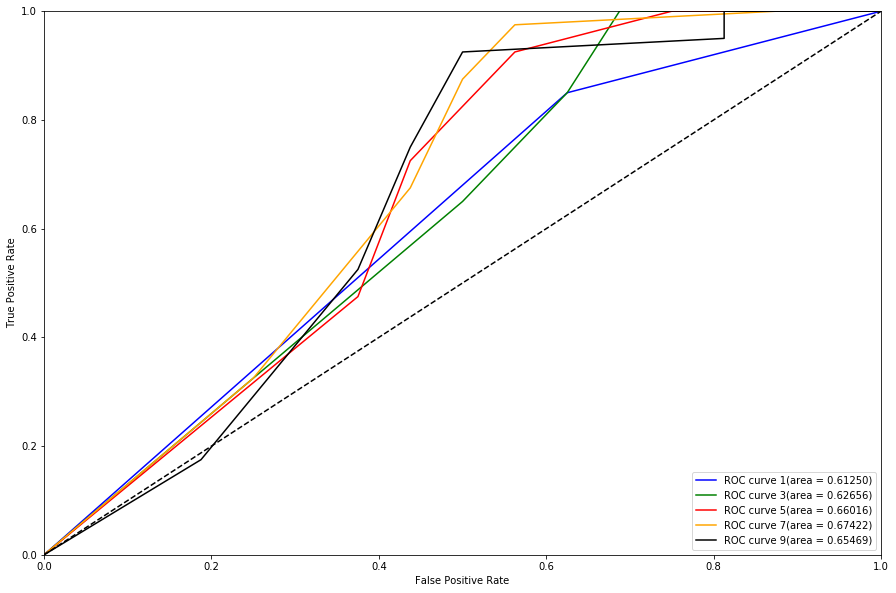

In [829]:
def KNN(input_dataframe):
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
    X = input_dataframe[features] 
    y = input_dataframe.quality
    
    # Splitting the data into training, testing and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
    
    # KNN Models
    knn_1 = KNeighborsClassifier(n_neighbors=1)
    knn_1.fit(X_train, y_train) 
    
    knn_3 = KNeighborsClassifier(n_neighbors=3)
    knn_3.fit(X_train, y_train)
    
    knn_5 = KNeighborsClassifier(n_neighbors=5)
    knn_5.fit(X_train, y_train)
        
    knn_7 = KNeighborsClassifier(n_neighbors=7)
    knn_7.fit(X_train, y_train)
        
    knn_9 = KNeighborsClassifier(n_neighbors=9)
    knn_9.fit(X_train, y_train)
    
    # Prediction for validation sets
    knn_1_pred_val = knn_1.predict(X_val)
    knn_3_pred_val = knn_3.predict(X_val)
    knn_5_pred_val = knn_5.predict(X_val)
    knn_7_pred_val = knn_7.predict(X_val)
    knn_9_pred_val = knn_9.predict(X_val)
    
    # Accuracies of KNN on validation set
    print("Accuracy of KNN K=1 for validation set:",metrics.accuracy_score(y_val, knn_1_pred_val))
    print("Accuracy of KNN K=3 for validation set:",metrics.accuracy_score(y_val, knn_3_pred_val))
    print("Accuracy of KNN K=5 for validation set:",metrics.accuracy_score(y_val, knn_5_pred_val))
    print("Accuracy of KNN K=7 for validation set:",metrics.accuracy_score(y_val, knn_7_pred_val))
    print("Accuracy of KNN K=9 for validation set:",metrics.accuracy_score(y_val, knn_9_pred_val))
    print('---------------------------------------------------------------------------------------')
    
    # Prediction for test sets
    knn_1_pred_test = knn_1.predict(X_test)
    knn_3_pred_test = knn_3.predict(X_test)
    knn_5_pred_test = knn_5.predict(X_test)
    knn_7_pred_test = knn_7.predict(X_test)
    knn_9_pred_test = knn_9.predict(X_test)
        
    # Accuracies of KNN on test set
    print("Accuracy of KNN K=1 for test set:",metrics.accuracy_score(y_test, knn_1_pred_val))
    print("Accuracy of KNN K=3 for test set:",metrics.accuracy_score(y_test, knn_3_pred_val))
    print("Accuracy of KNN K=5 for test set:",metrics.accuracy_score(y_test, knn_5_pred_val))
    print("Accuracy of KNN K=7 for test set:",metrics.accuracy_score(y_test, knn_7_pred_val))
    print("Accuracy of KNN K=9 for test set:",metrics.accuracy_score(y_test, knn_9_pred_val))
    
    # AUC and ROC
    KNN_ytest = label_binarize(y_test, classes=[0, 1])
    KNN_ytest_positive = KNN_ytest[KNN_ytest==1]
    
    print('----------------------------------------------------------')
    knn_1_probs = knn_1.predict_proba(X_test)
    knn_1_probs = knn_1_probs[:, 1]
    auc_1 = roc_auc_score(y_test, knn_1_probs)    
    print('AUC of KNN K=1: %.2f' % auc_1)
    
    knn_3_probs = knn_3.predict_proba(X_test)
    knn_3_probs = knn_3_probs[:, 1]
    auc_3 = roc_auc_score(y_test, knn_3_probs)    
    print('AUC of KNN K=3: %.2f' % auc_3)
    
    knn_5_probs = knn_5.predict_proba(X_test)
    knn_5_probs = knn_5_probs[:, 1]
    auc_5 = roc_auc_score(y_test, knn_5_probs)    
    print('AUC of KNN K=5: %.2f' % auc_5)
    
    knn_7_probs = knn_7.predict_proba(X_test)
    knn_7_probs = knn_7_probs[:, 1]
    auc_7 = roc_auc_score(y_test, knn_7_probs)    
    print('AUC of KNN K=7: %.2f' % auc_7)
    
    knn_9_probs = knn_9.predict_proba(X_test)
    knn_9_probs = knn_9_probs[:, 1]
    auc_9 = roc_auc_score(y_test, knn_9_probs)    
    print('AUC of KNN K=1: %.2f' % auc_9)
    
    fpr_1, tpr_1, threshold_1 = roc_curve(y_test, knn_1_probs)
    fpr_3, tpr_3, threshold_3 = roc_curve(y_test, knn_3_probs)
    fpr_5, tpr_5, threshold_5 = roc_curve(y_test, knn_5_probs)
    fpr_7, tpr_7, threshold_7 = roc_curve(y_test, knn_7_probs)
    fpr_9, tpr_9, threshold_9 = roc_curve(y_test, knn_9_probs)
    
    plt.figure(figsize=(15,10))
    plt.plot(fpr_1, tpr_1, label='ROC curve 1(area = %0.5f)' % auc_1, color = 'blue')
    plt.plot(fpr_3, tpr_3, label='ROC curve 3(area = %0.5f)' % auc_3, color = 'green')
    plt.plot(fpr_5, tpr_5, label='ROC curve 5(area = %0.5f)' % auc_5, color = 'red')
    plt.plot(fpr_7, tpr_7, label='ROC curve 7(area = %0.5f)' % auc_7, color = 'orange')
    plt.plot(fpr_9, tpr_9, label='ROC curve 9(area = %0.5f)' % auc_9, color = 'black')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('')
    plt.legend(loc="lower right")
    plt.show()
    
KNN(red_wine_quality)

### Analysis:
#### Validation Accuracies:

Accuracy of KNN K=1 for validation set: 0.7678571428571429

Accuracy of KNN K=3 for validation set: 0.75
    
Accuracy of KNN K=5 for validation set: 0.8214285714285714

<b>Accuracy of KNN K=7 for validation set: 0.8571428571428571</b>

Accuracy of KNN K=9 for validation set: 0.8392857142857143
    
#### Testing Accuracies:
    
Accuracy of KNN K=1 for test set: 0.6607142857142857
    
Accuracy of KNN K=3 for test set: 0.6785714285714286

Accuracy of KNN K=5 for test set: 0.7142857142857143
    
Accuracy of KNN K=7 for test set: 0.7142857142857143
    
<b>Accuracy of KNN K=9 for test set: 0.7321428571428571</b>
    
The KNN model with the best validation accuracy is with K=7.
The KNN model with the highest testing accuracy is with K=9. 
    
The KNN model with the best AUC(0.67) is with K=7 happens to be the KNN model with the highest validation accuracy with K=7.